In [ ]:
##### RELEVANT IMPORTS #####
import re

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import PorterStemmer
from PIL import Image

from datascience import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


# Job Industry Predictor

Research Question: "What are the key features and textual patterns that can be used to accurately classify job descriptions into their respective industries using machine learning techniques?"

Built an ML model that takes in a job description and predicts what job industry the description corresponds to...

### Data Cleaning

In [ ]:
real_job_postings = pd.read_csv('real_job_postings.csv')
real_job_postings['location'] = real_job_postings['location'].str.split(', ').str[0]
real_job_postings = real_job_postings[['function', 'description', 'location', 'employment_type']]
real_job_postings = real_job_postings.rename(columns={'location':'country', 'function':'industry'})

top_10_industries = real_job_postings['industry'].value_counts().head(10).index
real_job_postings = real_job_postings[real_job_postings['industry'].isin(top_10_industries)].reset_index(drop=True)

real_job_postings['description'] = real_job_postings['description'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)
real_job_postings['description'] = real_job_postings['description'].str.lower()
real_job_postings['description'] = real_job_postings['description'].str.replace(r'[\xa0]|[^\w\s]', ' ', regex=True)
real_job_postings['description'] = real_job_postings['description'].str.replace(r'http\S+', ' ', regex=True)
real_job_postings['description'] = real_job_postings['description'].str.replace(r'url\S+', ' ', regex=True)
real_job_postings['description'] = real_job_postings['description'].str.replace(r'\s+', ' ', regex=True)

stop_words = stopwords.words('english')
real_job_postings['sig_description'] = real_job_postings['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
real_job_postings

,industry,description,country,employment_type,sig_description
0,Marketing,food52 a fast growing james beard award winnin...,US,Other,food52 fast growing james beard award winning ...
1,Customer Service,organised focused vibrant awesome do you have ...,NZ,Full-time,organised focused vibrant awesome passion cust...
2,Sales,the company esri environmental systems researc...,US,Full-time,company esri environmental systems research in...
3,Health Care Provider,job title itemization review manager location ...,US,Full-time,job title itemization review manager location ...
4,Customer Service,the customer service associate will be based i...,US,Part-time,customer service associate based phoenix az ri...
...,...,...,...,...,...
8577,Sales,we are seeking an administrator to work in a b...,GB,Full-time,seeking administrator work busy sales environm...
8578,Information Technology,sr java script developer experience 4 10 years...,US,Full-time,sr java script developer experience 4 10 years...
8579,Sales,just in case this is the first time you ve vis...,CA,Full-time,case first time visited website vend award win...
8580,Design,nemsia studios is looking for an experienced v...,NG,Contract,nemsia studios looking experienced visual grap...


In [ ]:
#put all the descriptions of the same industry into one array
def joinDescription(industry):
    only_industry = real_job_postings[real_job_postings['industry'] == industry]
    combined_description = ' '.join(only_industry['sig_description'])
    return combined_description

#use wordcloud to print the most occurances of each word in the description
def print_graph(one_description):
    # Start with one review:
    text = one_description
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    test = new_df[new_df['full_description'] == one_description]['unique_industry']
    print(test)
    # Display the generated image:
    %matplotlib inline
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
#find all the unique industries
all_industry = real_job_postings['industry'].unique()
#put all the industry descriptions together
all_joined_descriptions = []
for industry in all_industry:
    all_joined_descriptions.append(joinDescription(industry))
data = {
    'unique_industry': all_industry,
    'full_description': all_joined_descriptions
}
new_df = pd.DataFrame(data)
new_df

,unique_industry,full_description
0,Marketing,food52 fast growing james beard award winning ...
1,Customer Service,organised focused vibrant awesome passion cust...
2,Sales,company esri environmental systems research in...
3,Health Care Provider,job title itemization review manager location ...
4,Information Technology,position developer job location united states ...
5,Other,event industry installers needed orlando fl ne...
6,Engineering,looking hands qa leader talented r amp team lo...
7,Administrative,customer service associate based toronto right...
8,Design,love clients getting conduit communication lov...
9,Education,play kids get paid love travel openings china ...


In [ ]:
# Checking random descriptions for data cleaning
real_job_postings['description'][665]

'qualifications a bachelor degree in mechanical or plant engineering degree can be waived based on other acceptable education and previous work experience '

In [ ]:
# Checking more descriptions for data cleaning

"""
real_job_postings = pd.read_csv('real_job_postings.csv')
real_job_postings['location'] = real_job_postings['location'].str.split(', ').str[0]
real_job_postings = real_job_postings[['function', 'description', 'location', 'employment_type']]
real_job_postings = real_job_postings.rename(columns={'location':'country', 'function':'industry'})
real_job_postings = real_job_postings[~real_job_postings['industry'].isnull()]

top_10_industries = real_job_postings['industry'].value_counts().head(10).index
real_job_postings = real_job_postings[real_job_postings['industry'].isin(top_10_industries)].reset_index(drop=True)
np.random.seed(2305984) # Original seed was 123
# pick a random document, show the top 5 terms (in terms of tf_idf score)
i = np.random.choice(N)
row = real_job_postings.iloc[i]
print("Text:", row['description'].split("\n", 1)[0])
"""


'\nreal_job_postings = pd.read_csv(\'real_job_postings.csv\')\nreal_job_postings[\'location\'] = real_job_postings[\'location\'].str.split(\', \').str[0]\nreal_job_postings = real_job_postings[[\'function\', \'description\', \'location\', \'employment_type\']]\nreal_job_postings = real_job_postings.rename(columns={\'location\':\'country\', \'function\':\'industry\'})\nreal_job_postings = real_job_postings[~real_job_postings[\'industry\'].isnull()]\n\ntop_10_industries = real_job_postings[\'industry\'].value_counts().head(10).index\nreal_job_postings = real_job_postings[real_job_postings[\'industry\'].isin(top_10_industries)].reset_index(drop=True)\nnp.random.seed(2305984) # Original seed was 123\n# pick a random document, show the top 5 terms (in terms of tf_idf score)\ni = np.random.choice(N)\nrow = real_job_postings.iloc[i]\nprint("Text:", row[\'description\'].split("\n", 1)[0])\n'

### EDA/Visualizations

In [ ]:
real_job_postings.shape

(8582, 5)

In [ ]:
real_job_postings['industry'].value_counts()#.head()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Name: industry, dtype: int64

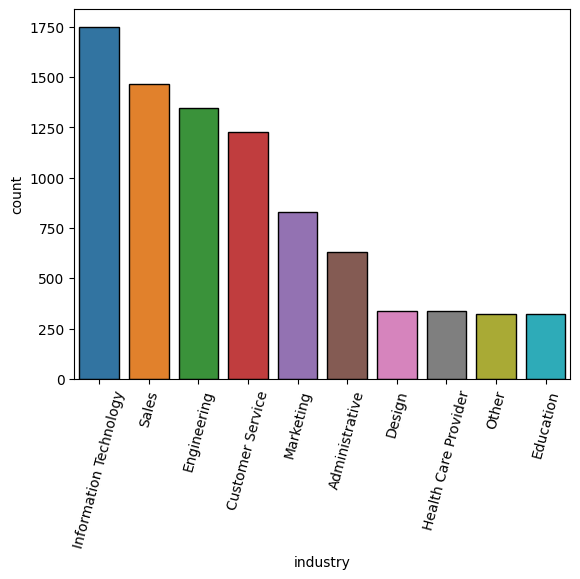

In [ ]:
# https://stackoverflow.com/questions/46623583/order-categories-by-count-in-a-seaborn-countplot

%matplotlib inline
top_10_industries = real_job_postings['industry'].value_counts().head(10).index
top_10_industry_df = real_job_postings[real_job_postings['industry'].isin(top_10_industries)]
sns.countplot(data=top_10_industry_df, x='industry', order=top_10_industry_df['industry'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

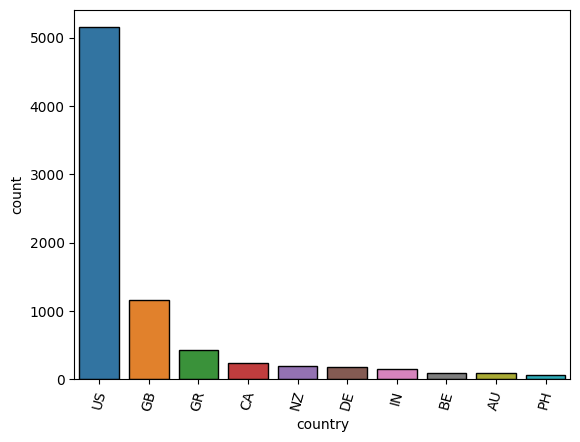

In [ ]:
%matplotlib inline
top_10_countries = real_job_postings['country'].value_counts().head(10).index
top_10_country_df = real_job_postings[real_job_postings['country'].isin(top_10_countries)]
sns.countplot(data=top_10_country_df, x='country', order=top_10_country_df['country'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

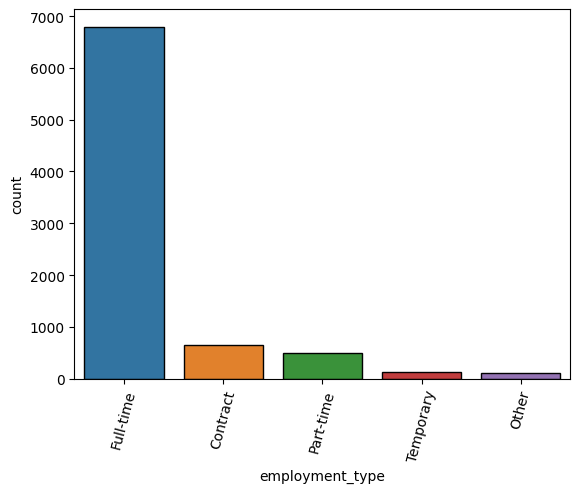

In [ ]:
%matplotlib inline
employment_types = real_job_postings['employment_type'].value_counts().index
employment_types_df = real_job_postings[real_job_postings['employment_type'].isin(employment_types)]
sns.countplot(data=employment_types_df, x='employment_type', order=employment_types_df['employment_type'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

0    Marketing
Name: unique_industry, dtype: object


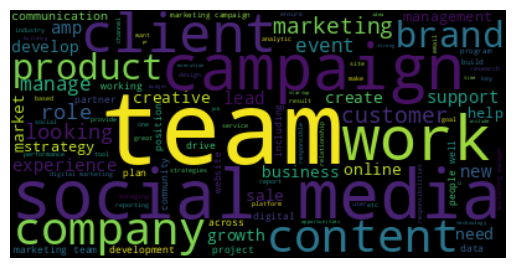

1    Customer Service
Name: unique_industry, dtype: object


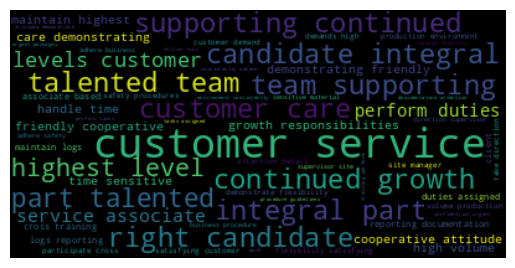

2    Sales
Name: unique_industry, dtype: object


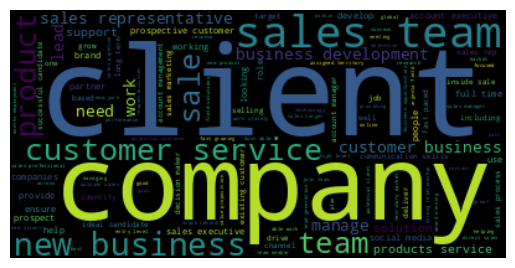

3    Health Care Provider
Name: unique_industry, dtype: object


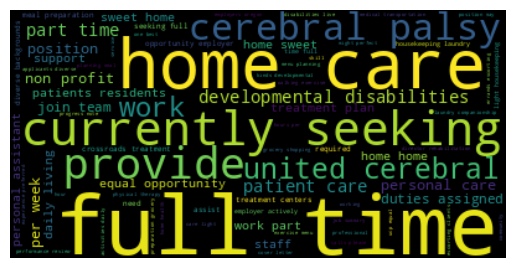

4    Information Technology
Name: unique_industry, dtype: object


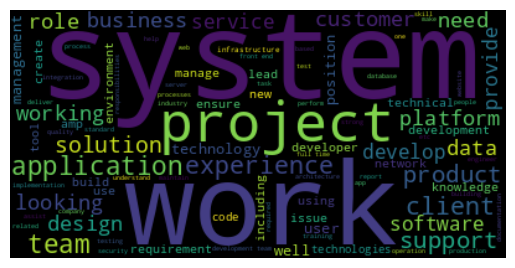

5    Other
Name: unique_industry, dtype: object


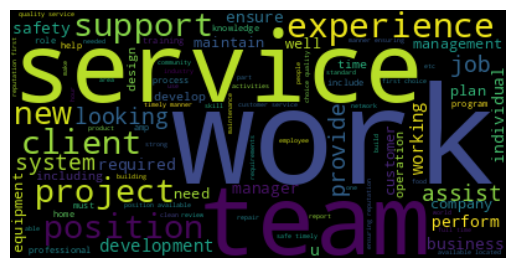

6    Engineering
Name: unique_industry, dtype: object


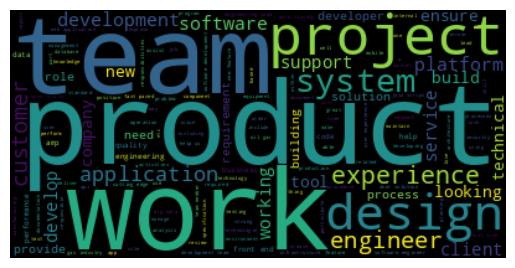

7    Administrative
Name: unique_industry, dtype: object


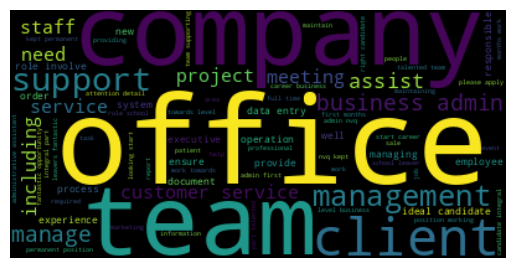

8    Design
Name: unique_industry, dtype: object


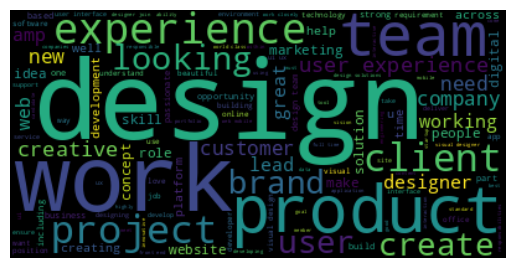

9    Education
Name: unique_industry, dtype: object


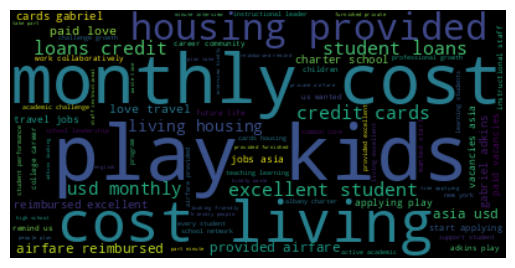

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: full_description, dtype: object

In [ ]:
#show the wordcloud graph of the most common word used in each unique industry description
new_df['full_description'].apply(print_graph)

### Machine Learning!

In [ ]:
idx = 0 
word2idx = {} 
tokenized_docs = [] 
for doc in real_job_postings['sig_description']: 
  words = word_tokenize(doc.lower())
  doc_as_int = []
  for word in words:
    if word not in word2idx:
      word2idx[word] = idx
      idx += 1
        # save for later
    doc_as_int.append(word2idx[word])
  tokenized_docs.append(doc_as_int)

In [ ]:
# reverse mapping
# if you do it smarter you can store it as a list
idx2word = {v:k for k, v in word2idx.items()}

In [ ]:
# number of documents
N = len(real_job_postings['sig_description'])

In [ ]:
# number of words
V = len(word2idx)

In [ ]:
# instantiate term-frequency matrix
# note: you could use also use count vectorizer here too
tf = np.zeros((N, V))

In [ ]:
# populate term frequency counts
for i, doc_as_int in enumerate(tokenized_docs):
  for j in doc_as_int:
    tf[i, j] += 1

In [ ]:
# compute IDF Note that can be derived from the TF matrix
document_freq = np.sum(tf > 0, axis=0) # document frequency (shape = (V,))
idf = np.log(N / document_freq)

In [ ]:
#  compute TF-IDF
tf_idf = tf * idf

In [ ]:
np.random.seed(225) # Original seed was 123, 225, 553
# pick a random document, show the top 5 terms (in terms of tf_idf score)
i = np.random.choice(N)
row = real_job_postings.iloc[i]
print("Label:", row['industry'])
print("Text:", row['sig_description'].split("\n", 1)[0])
print("Top 5 terms:")

scores = tf_idf[i]
indices = (-scores).argsort()

for j in indices[:5]:
  print(idx2word[j])

Label: Engineering
Text: looking full time frontend engineer content authoring tools f full time start immediately office berlin kreuzberg germany millions regular users 7 000 hours premium content growing fast shaping future learning creative innovative problem solver vision make things work motivated software engineer passion frontend loves work ambitious colleagues challenging environment mission significantly enhance content authoring capabilities teams well implement completely new features taking existing content next level frontend engineer internal tools work together product owners backend engineers didactics team enable team deliver high quality content make product truly shine responsibilities work part agile team deliver internal tools products fast paced environment experiment new frontend development technologies build git based content production pipeline use test learn adapt approach work stakeholders build optimal content authoring tool experience continuously analyse 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'real_job_postings' contains your dataset with 'sig_description' and 'industry' columns

# Split the data into training and testing sets
X = real_job_postings['sig_description']
Y = real_job_postings['industry']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 61.97%
